## Perspective

<p style='direction:rtl; text-align: right'>
برای محسابه تصویر، از روش Homography induced by a plane استفاده می‌کنیم که با داشتن ماتریس کالیبراسیون دو دوربین، انتقال و دوران
بین دو دوربین و معادله صفحه، می‌توان ماتریس هوموگرافی را محسابه کرد و در نهایت بر اساس آن،‌ تصویر را وارپ کرد.
<br>
در اینجا، مختصات محلی‌ دوربین وسط زمین را مختصات جهانی در نظر میگیریم و دوربین کنار زمین و سطح زمین را بر اساس آن توصیف می‌کنیم.
حال ماتریس هوموگرافی‌ای که به دست می‌آید برای تبدیل نمای دوربین اول به دوم است. بنابرین باید از وارون آن ماتریس استفاده کنیم چرا که میخواهیم نمای کنار زمین
را به نمای بالای زمین تبدیل کنیم.
</p>

<p style='direction:rtl; text-align: right'>
ایمپورت های لازم را انجام می‌دهیم و سپس ماتریس کالیبراسیون دو دوربین را محاسبه می‌کنیم:
</p>



In [1]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt
from scipy.spatial.transform import Rotation
import math

# parameters

cams_h = 25.
cams_dist = 40.

cam1_f = 500  # camera #1 is the top view
cam2_f = 500  # camera #2 is the side camera
cam1_size = np.array([2000, 2000])  # xy system
cam2_size = np.array([256, 256])  # xy system

k1 = np.array([[cam1_f, 0, cam1_size[0] / 2],
               [0, cam1_f, cam1_size[1] / 2],
               [0, 0, 1]])
k2 = np.array([[cam2_f, 0, cam2_size[0] / 2],
               [0, cam2_f, cam2_size[1] / 2],
               [0, 0, 1]])

plane_normal = np.array([0, 0, -1])
d = 25.

<p style='direction:rtl; text-align: right'>
حال بر اساس رابطه موجود در اسلایدهای درس،‌ ماتریس هوموگرافی را محسابه می‌کنیم:
</p>


In [2]:
c2 = np.array([0, cams_dist, 0])
r2 = Rotation.from_euler('x', math.atan(-cams_dist / cams_h)).as_matrix()
t2 = -np.matmul(r2, c2)

h = np.matmul(k2, r2 - np.matmul(t2[..., None], plane_normal[..., None].T) / d)
h = np.matmul(h, np.linalg.inv(k1))
h = np.linalg.inv(h)

<p style='direction:rtl; text-align: right'>
و در نهایت تصویر را وارپ می‌کنیم:
</p>

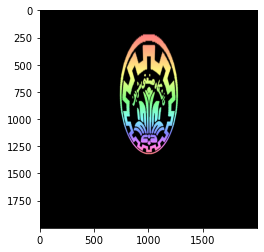

In [3]:
img = plt.imread('./data/hw1/logo.png')
img_warped = cv.warpPerspective(img, h, tuple(cam1_size))
plt.imshow(img_warped)
plt.show()
